In [ ]:
import numpy as np

# 定义模拟参数
num_simulations = 10000  # 蒙特卡洛模拟次数

# 各种配件的次品率(转换为不合格品率)
defective_rate_part1 = 0.10
defective_rate_part2 = 0.10
defective_rate_final_product = 0.10

# 成本参数 (单位: 元)
cost_part1_purchase = 4
cost_part1_inspection = 2
cost_part2_purchase = 18
cost_part2_inspection = 3
cost_assembly = 6
cost_final_inspection = 3
final_product_price = 56

# 不合格品处理成本
replacement_loss = 6  # 调换损失
disassembly_cost = 5   # 拆解费用

### 1. **定义模拟参数**

首先定义了一些与生产相关的参数，包括次品率、成本、售价等：

- `num_simulations`: 这是蒙特卡洛模拟的迭代次数，代表模拟执行的次数。在这段代码中，设定了 10000 次模拟，以确保结果的稳定性。
- `defective_rate_part1`, `defective_rate_part2`, `defective_rate_final_product`: 分别表示零配件1、零配件2和最终产品的次品率，假设每种的次品率均为 10%。
- `cost_part1_purchase`, `cost_part2_purchase`: 分别表示购买零配件1和零配件2的成本。
- `cost_part1_inspection`, `cost_part2_inspection`: 分别表示检测零配件1和零配件2的成本。
- `cost_assembly`: 装配一个成品的成本。
- `cost_final_inspection`: 最终成品检测的成本。
- `final_product_price`: 最终产品的市场售价。
- `replacement_loss`: 如果成品不合格，需要进行调换时的损失。
- `disassembly_cost`: 如果成品不合格，还需拆解的成本。

In [7]:

# 模拟过程
def simulate_production():
    # 随机确定零配件1是否不合格
    part1_defective = np.random.rand() < defective_rate_part1
    part2_defective = np.random.rand() < defective_rate_part2

    # 如果零配件1或零配件2不合格，直接废弃，并产生购买及检测成本
    if part1_defective:
        total_cost = cost_part1_purchase + cost_part1_inspection
        return total_cost, 0
    if part2_defective:
        total_cost = cost_part2_purchase + cost_part2_inspection
        return total_cost, 0

    # 如果零配件合格，继续装配，产生装配和成品检测成本
    total_cost = (cost_part1_purchase + cost_part1_inspection + 
                  cost_part2_purchase + cost_part2_inspection + 
                  cost_assembly + cost_final_inspection)

    # 随机确定成品是否不合格
    final_product_defective = np.random.rand() < defective_rate_final_product

    if final_product_defective:
        # 如果成品不合格，产生调换损失
        total_cost += replacement_loss + disassembly_cost
        return total_cost, 0
    else:
        # 如果成品合格，进入市场，产生收益
        return total_cost, final_product_price


(np.float64(32.6794), np.float64(40.7512), np.float64(8.071799999999996))

### 2. **模拟过程的逻辑**

**主要函数：`simulate_production()`**

这个函数模拟了一次生产过程的成本和收益。主要逻辑如下：

1. **零配件检测：**
   - 首先通过随机数生成，决定零配件1和零配件2是否为次品。如果生成的随机数小于次品率，则视为次品。例如，`part1_defective = np.random.rand() < defective_rate_part1` 表示随机生成一个0到1之间的数，如果该数小于0.1（次品率为10%），则零配件1视为次品。
   - 如果零配件1或零配件2有任何一个是次品，该零配件直接废弃，并产生相应的采购和检测成本。此时函数直接返回该次模拟的成本，并且收益为0，因为不合格品不能进入市场。
   
2. **成品检测：**
   - 如果零配件1和2都合格，系统将计算购买和检测的总成本，加上装配和最终检测的成本。
   - 然后再次通过随机数生成决定最终产品是否为次品。如果成品是次品，企业将产生调换损失和拆解费用，收益依然为0。
   - 如果成品合格，成品将进入市场，产生收益（即`final_product_price`）。
**返回值：**
- `total_cost`: 计算本次模拟中所花费的总成本。
- `final_product_price`（如果合格）或者 0（如果不合格）：表示收益。

平均成本: 32.3725, 平均收益: 40.7904, 平均利润: 8.4179


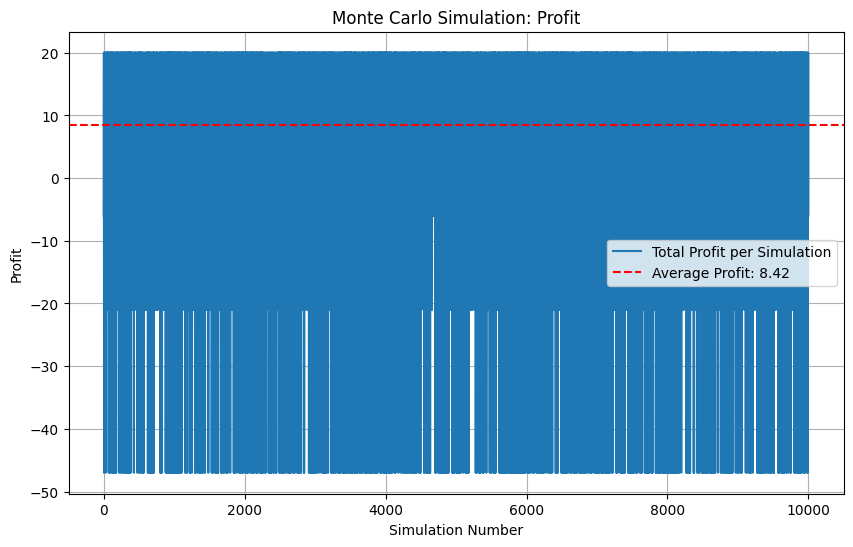

In [12]:
import matplotlib.pyplot as plt

total_costs = []
total_revenues = []
total_profit = []

# 蒙特卡洛模拟
for _ in range(num_simulations):
    cost, revenue = simulate_production()
    total_costs.append(cost)
    total_revenues.append(revenue)
    total_profit.append(revenue - cost)  # 计算利润

# 计算平均成本、收益和净利润
avg_cost_1 = np.mean(total_costs)
avg_revenue_1 = np.mean(total_revenues)
avg_profit_1 = np.mean(total_profit)

print(f"平均成本: {avg_cost_1}, 平均收益: {avg_revenue_1}, 平均利润: {avg_profit_1}")

# 画出利润的图像
plt.figure(figsize=(10, 6))
plt.plot(total_profit, label='Total Profit per Simulation')
plt.axhline(avg_profit_1, color='red', linestyle='--', label=f'Average Profit: {avg_profit_1:.2f}')
plt.title('Monte Carlo Simulation: Profit')
plt.xlabel('Simulation Number')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()


### 3. **蒙特卡洛模拟的执行**

- **循环模拟过程**：通过 `for _ in range(num_simulations)`，执行 10000 次 `simulate_production()` 模拟，每次都记录相应的成本和收益。
  
- **结果汇总**：使用 `np.mean()` 分别计算所有模拟中的平均成本和平均收益。

### 4. **计算与输出**

- `avg_cost`: 代表10000次模拟的平均生产成本。
- `avg_revenue`: 代表10000次模拟的平均收益。
- `net_profit`: 代表最终的平均净利润，计算公式为：`net_profit = avg_revenue - avg_cost`。

### 代码整体逻辑总结：
1. 每次模拟会随机生成零配件和成品是否为次品。
2. 根据是否为次品决定是否产生废弃、装配、检测或调换的成本。
3. 成品合格则产生收益，不合格则产生额外的调换和拆解成本。
4. 通过多次模拟，计算出平均生产成本、平均收益和净利润。
